In [ ]:
from google.colab.patches import cv2_imshow

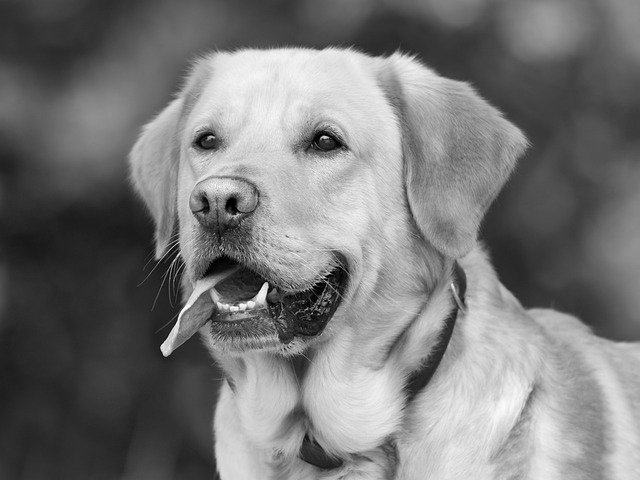

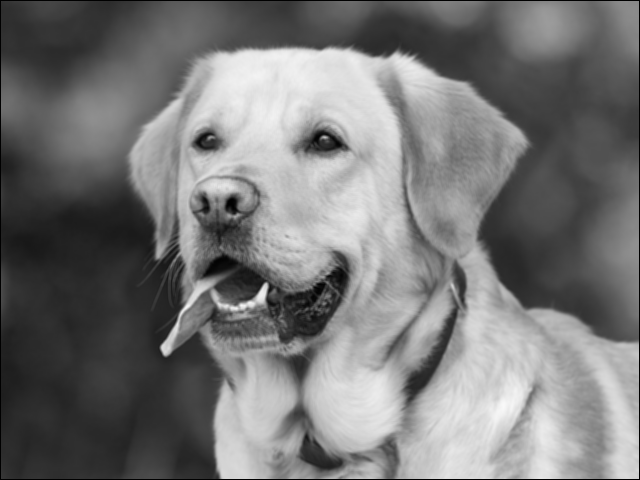

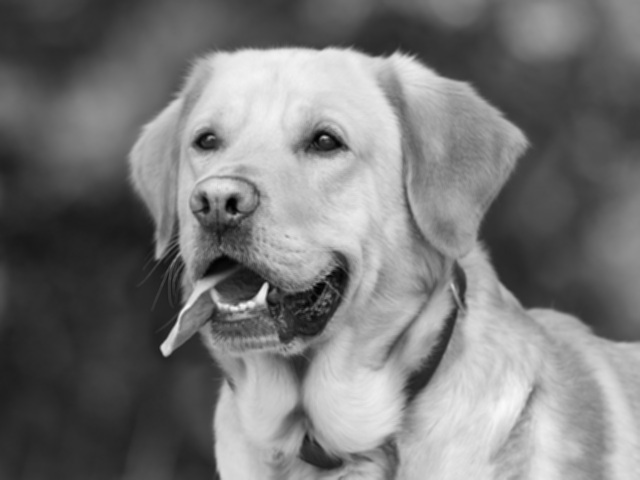

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def linear_filter_user_defined(image, kernel):
    result = np.zeros_like(image)
    kernel_size = len(kernel)
    offset = kernel_size // 2

    for y in range(offset, image.shape[0] - offset):
        for x in range(offset, image.shape[1] - offset):
            roi = image[y - offset:y + offset + 1, x - offset:x + offset + 1]
            result[y, x] = np.sum(roi * kernel)

    return result

# Provide the correct path to your image file
image_path = '/content/doogy.jpg'

# Read the image with error handling
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is None:
    print(f"Error: Unable to read the image from {image_path}")
else:
    # Define a simple kernel (e.g., a blur kernel)
    kernel = np.ones((3, 3), dtype=np.float32) / 9.0

    # Apply the user-defined filter
    result_user_defined = linear_filter_user_defined(image, kernel)

    # Apply the built-in filter using OpenCV
    result_opencv = cv2.filter2D(image, -1, kernel)

    # Display the results using cv2_imshow
    cv2_imshow(image)
    cv2_imshow(result_user_defined)
    cv2_imshow(result_opencv)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction
from skimage.io import imread, imshow

# For Spatial Filters
from scipy.signal import convolve2d
from skimage.color import rgb2gray, gray2rgb

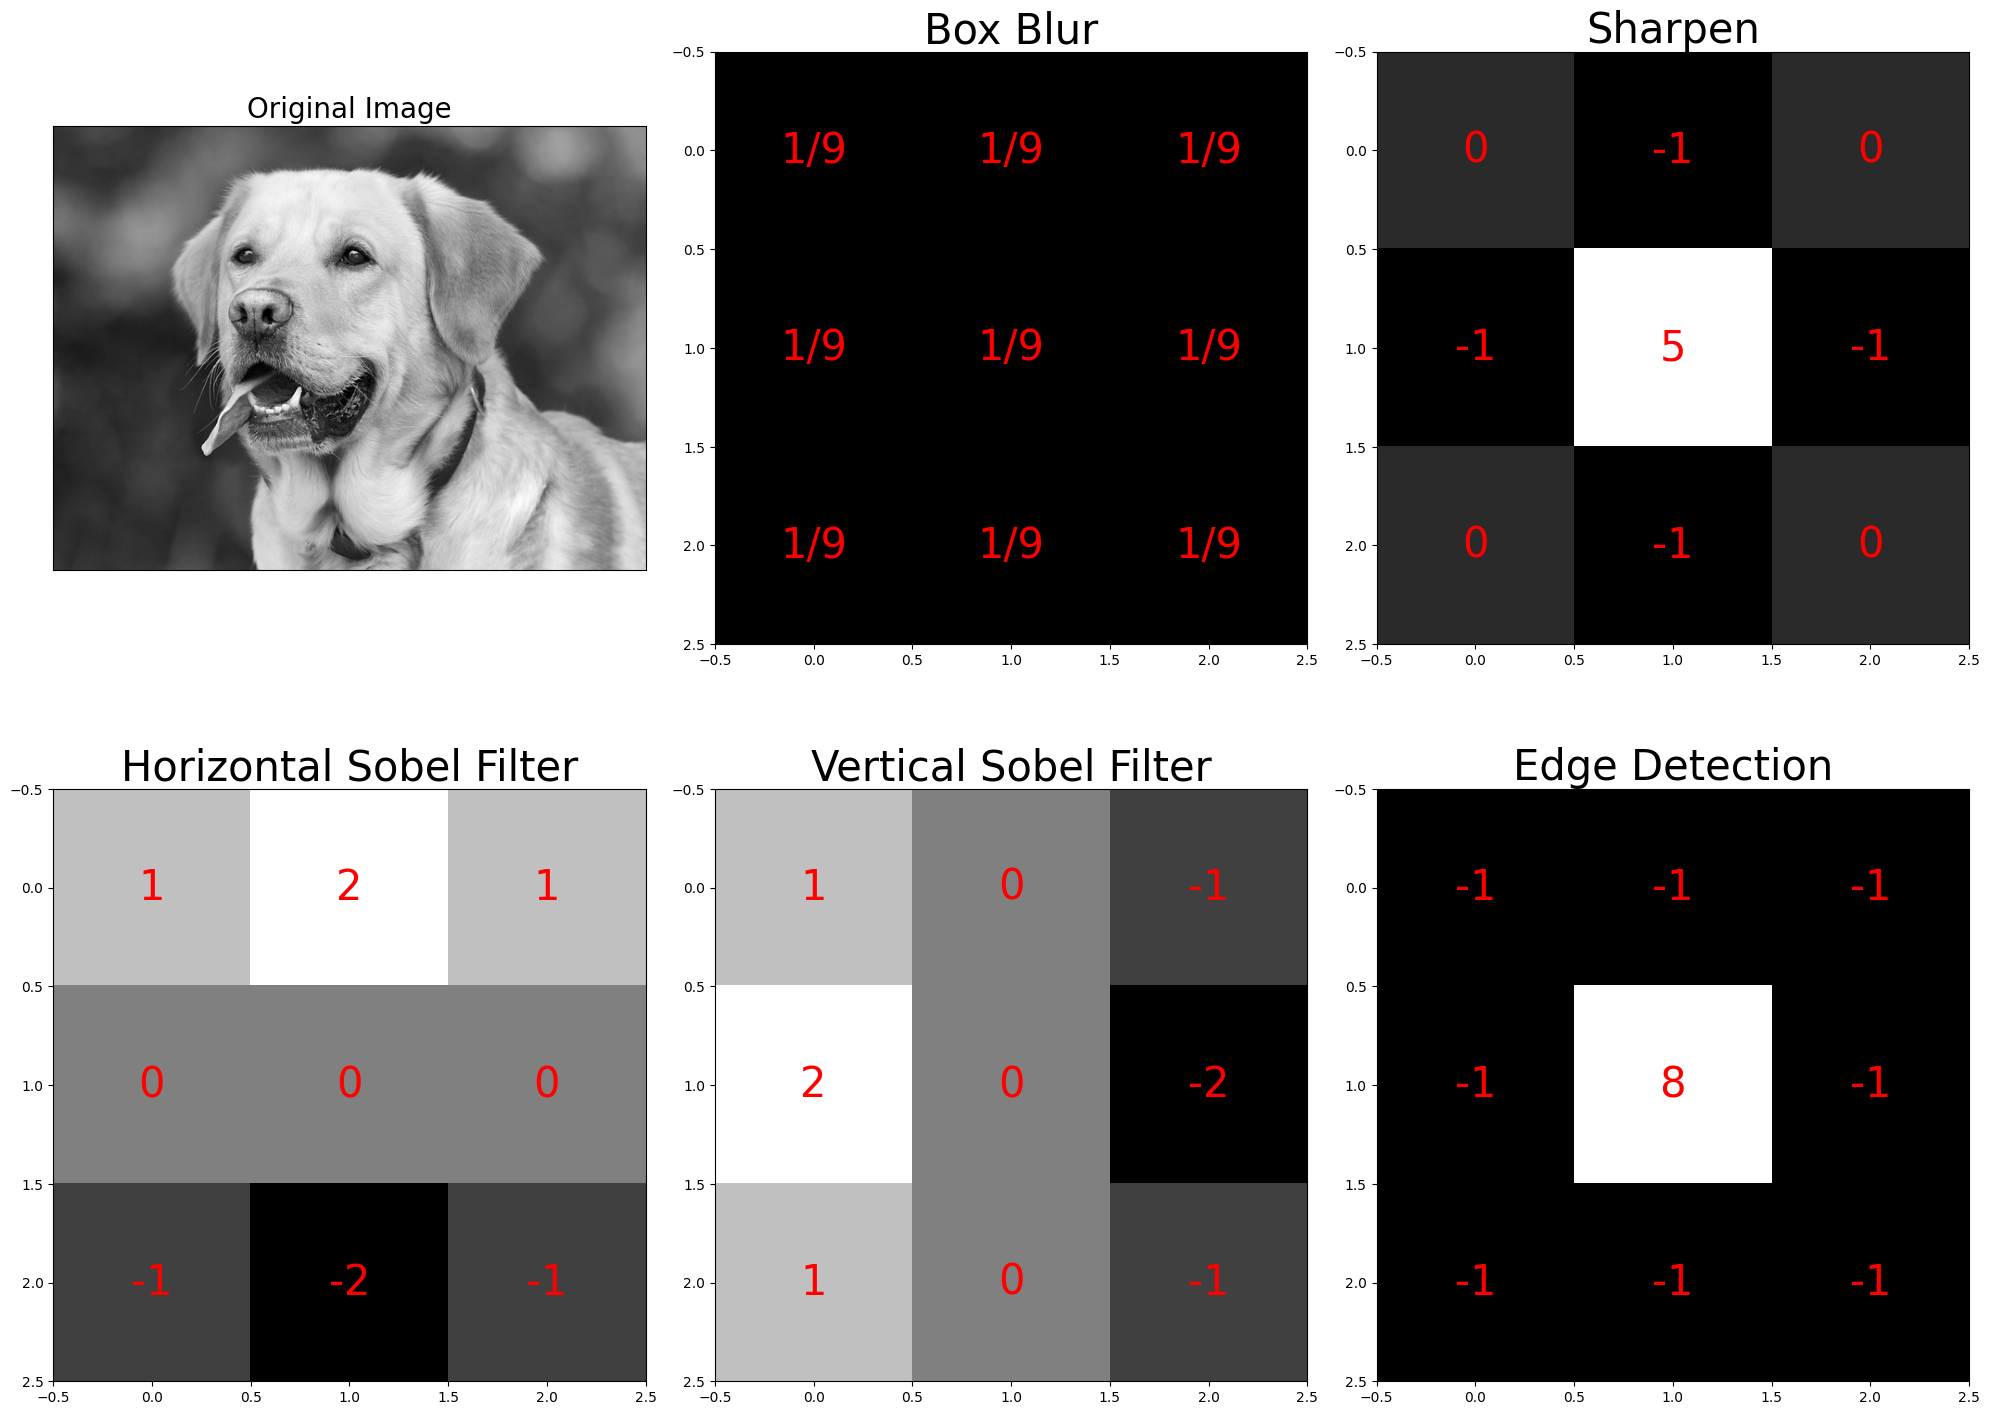

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction
from skimage.io import imread
from skimage.color import rgb2gray

# Define Filters
# Horizontal Sobel Filter
kernel_hsf = np.array([[1, 2, 1],
                       [0, 0, 0],
                       [-1, -2, -1]])

# Vertical Sobel Filter
kernel_vsf = np.array([[1, 0, -1],
                       [2, 0, -2],
                       [1, 0, -1]])

# Edge Detection
kernel_edge = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])

# Sharpen
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Box Blur
kernel_bblur = (1 / 9.0) * np.array([[1., 1., 1.],
                                      [1., 1., 1.],
                                      [1., 1., 1.]])

# Define the kernels
kernels = {
    'Box Blur': kernel_bblur,
    'Sharpen': kernel_sharpen,
    'Horizontal Sobel Filter': kernel_hsf,
    'Vertical Sobel Filter': kernel_vsf,
    'Edge Detection': kernel_edge,
}


def display_filters(image_path, kernels):
    # Read the image
    image = imread(image_path)[:, :, :3]

    # Create a figure with subplots for each kernel
    fig, ax = plt.subplots(2, 3, figsize=(20, 15))

    ax[0, 0].imshow(rgb2gray(image), cmap='gray')
    ax[0, 0].set_title('Original Image', fontsize=20)
    ax[0, 0].set_xticks([])
    ax[0, 0].set_yticks([])

    # Loop over the keys and values in the kernels dictionary
    for i, (name, kernel) in enumerate(kernels.items(), 1):
        # Determine the subplot index
        row = i // 3
        col = i % 3

        # Plot the kernel on the appropriate subplot
        ax[row, col].imshow(kernel, cmap='gray')
        ax[row, col].set_title(name, fontsize=30)

        # Loop over the cells in the kernel
        for (j, k), val in np.ndenumerate(kernel):
            # Add a text annotation at (j, k) with the value of the cell
            # If the value is less than 1, represent it as a fraction
            if val < 1:
                ax[row, col].text(k,
                                  j,
                                  str(Fraction(val).limit_denominator()),
                                  ha='center',
                                  va='center',
                                  color='red',
                                  fontsize=30)
            else:
                ax[row, col].text(k,
                                  j,
                                  str(val),
                                  ha='center',
                                  va='center',
                                  color='red',
                                  fontsize=30)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Display filters
display_filters('/content/doogy.jpg', kernels)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from scipy.signal import convolve2d

def apply_selected_kernels(image_path, selected_kernels, plot_cols=3):
    """Applies selected kernels or filters to an image.
    The image is read from the provided image_path, and the specified kernels
    are applied to it. The results are then displayed in a subplot alongside
    the original image.

    Args:
    image_path (str): The path to the image to which the filters
    should be applied.
    selected_kernels (list): A list of kernels to apply to the image.
    plot_cols (int, optional): The number of columns in the subplot.
    Default is 3.

    Raises:
    ValueError: If a selected kernel is not defined.
    """
    # Define the filters
    kernel_hsf = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])  # Horizontal Sobel Filter

    kernel_vsf = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])  # Vertical Sobel Filter

    kernel_edge = np.array([[-1, -1, -1],
                            [-1, 8, -1],
                            [-1, -1, -1]])  # Edge Detection

    kernel_sharpen = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])  # Sharpen

    kernel_bblur = (1 / 9.0) * np.array([[1., 1., 1.],
                                          [1., 1., 1.],
                                          [1., 1., 1.]])  # Box Blur

    # Define the kernels
    all_kernels = {
        'Box Blur': kernel_bblur,
        'Sharpen': kernel_sharpen,
        'Horizontal Sobel Filter': kernel_hsf,
        'Vertical Sobel Filter': kernel_vsf,
        'Edge Detection': kernel_edge,
    }

    # Check if the selected kernels are defined, if not raise an exception
    for k in selected_kernels:
        if k not in all_kernels:
            raise ValueError(f"Kernel '{k}' not defined.")

    # Read the image
    image = imread(image_path)[:, :, :3]

    # Apply selected kernels to each color channel of the image and
    # save the resulting converted RGB images
    conv_rgb_images = {}
    for kernel_name in selected_kernels:
        kernel = all_kernels[kernel_name]
        transformed_channels = []
        for i in range(3):
            conv_image = convolve2d(image[:, :, i], kernel, 'valid')
            transformed_channels.append(abs(conv_image))

        conv_rgb_image = np.dstack(transformed_channels)
        conv_rgb_image = np.clip(conv_rgb_image, 0, 255).astype(np.uint8)
        conv_rgb_images[kernel_name] = conv_rgb_image

    # Display the original image along with the combined results of all
    # the kernels in a subplot
    fig, ax = plt.subplots(2, plot_cols, figsize=(20, 20))

    ax[0, 0].imshow(image)
    ax[0, 0].set_title('Original Image', fontsize=20)
    ax[0, 0].set_xticks([])
    ax[0, 0].set_yticks([])

    for i, (kernel_name, conv_rgb_image) in enumerate(conv_rgb_images.items(), 1):
        row, col = divmod(i, plot_cols)
        ax[row, col].imshow(conv_rgb_image)
        ax[row, col].set_title(kernel_name, fontsize=20)
        ax[row, col].set_xticks([])
        ax[row, col].set_yticks([])

    plt.tight_layout()
    plt.show()

# Example usage:
# apply_selected_kernels('/content/doogy.jpg', ['Box Blur', 'Sharpen', 'Edge Detection'])


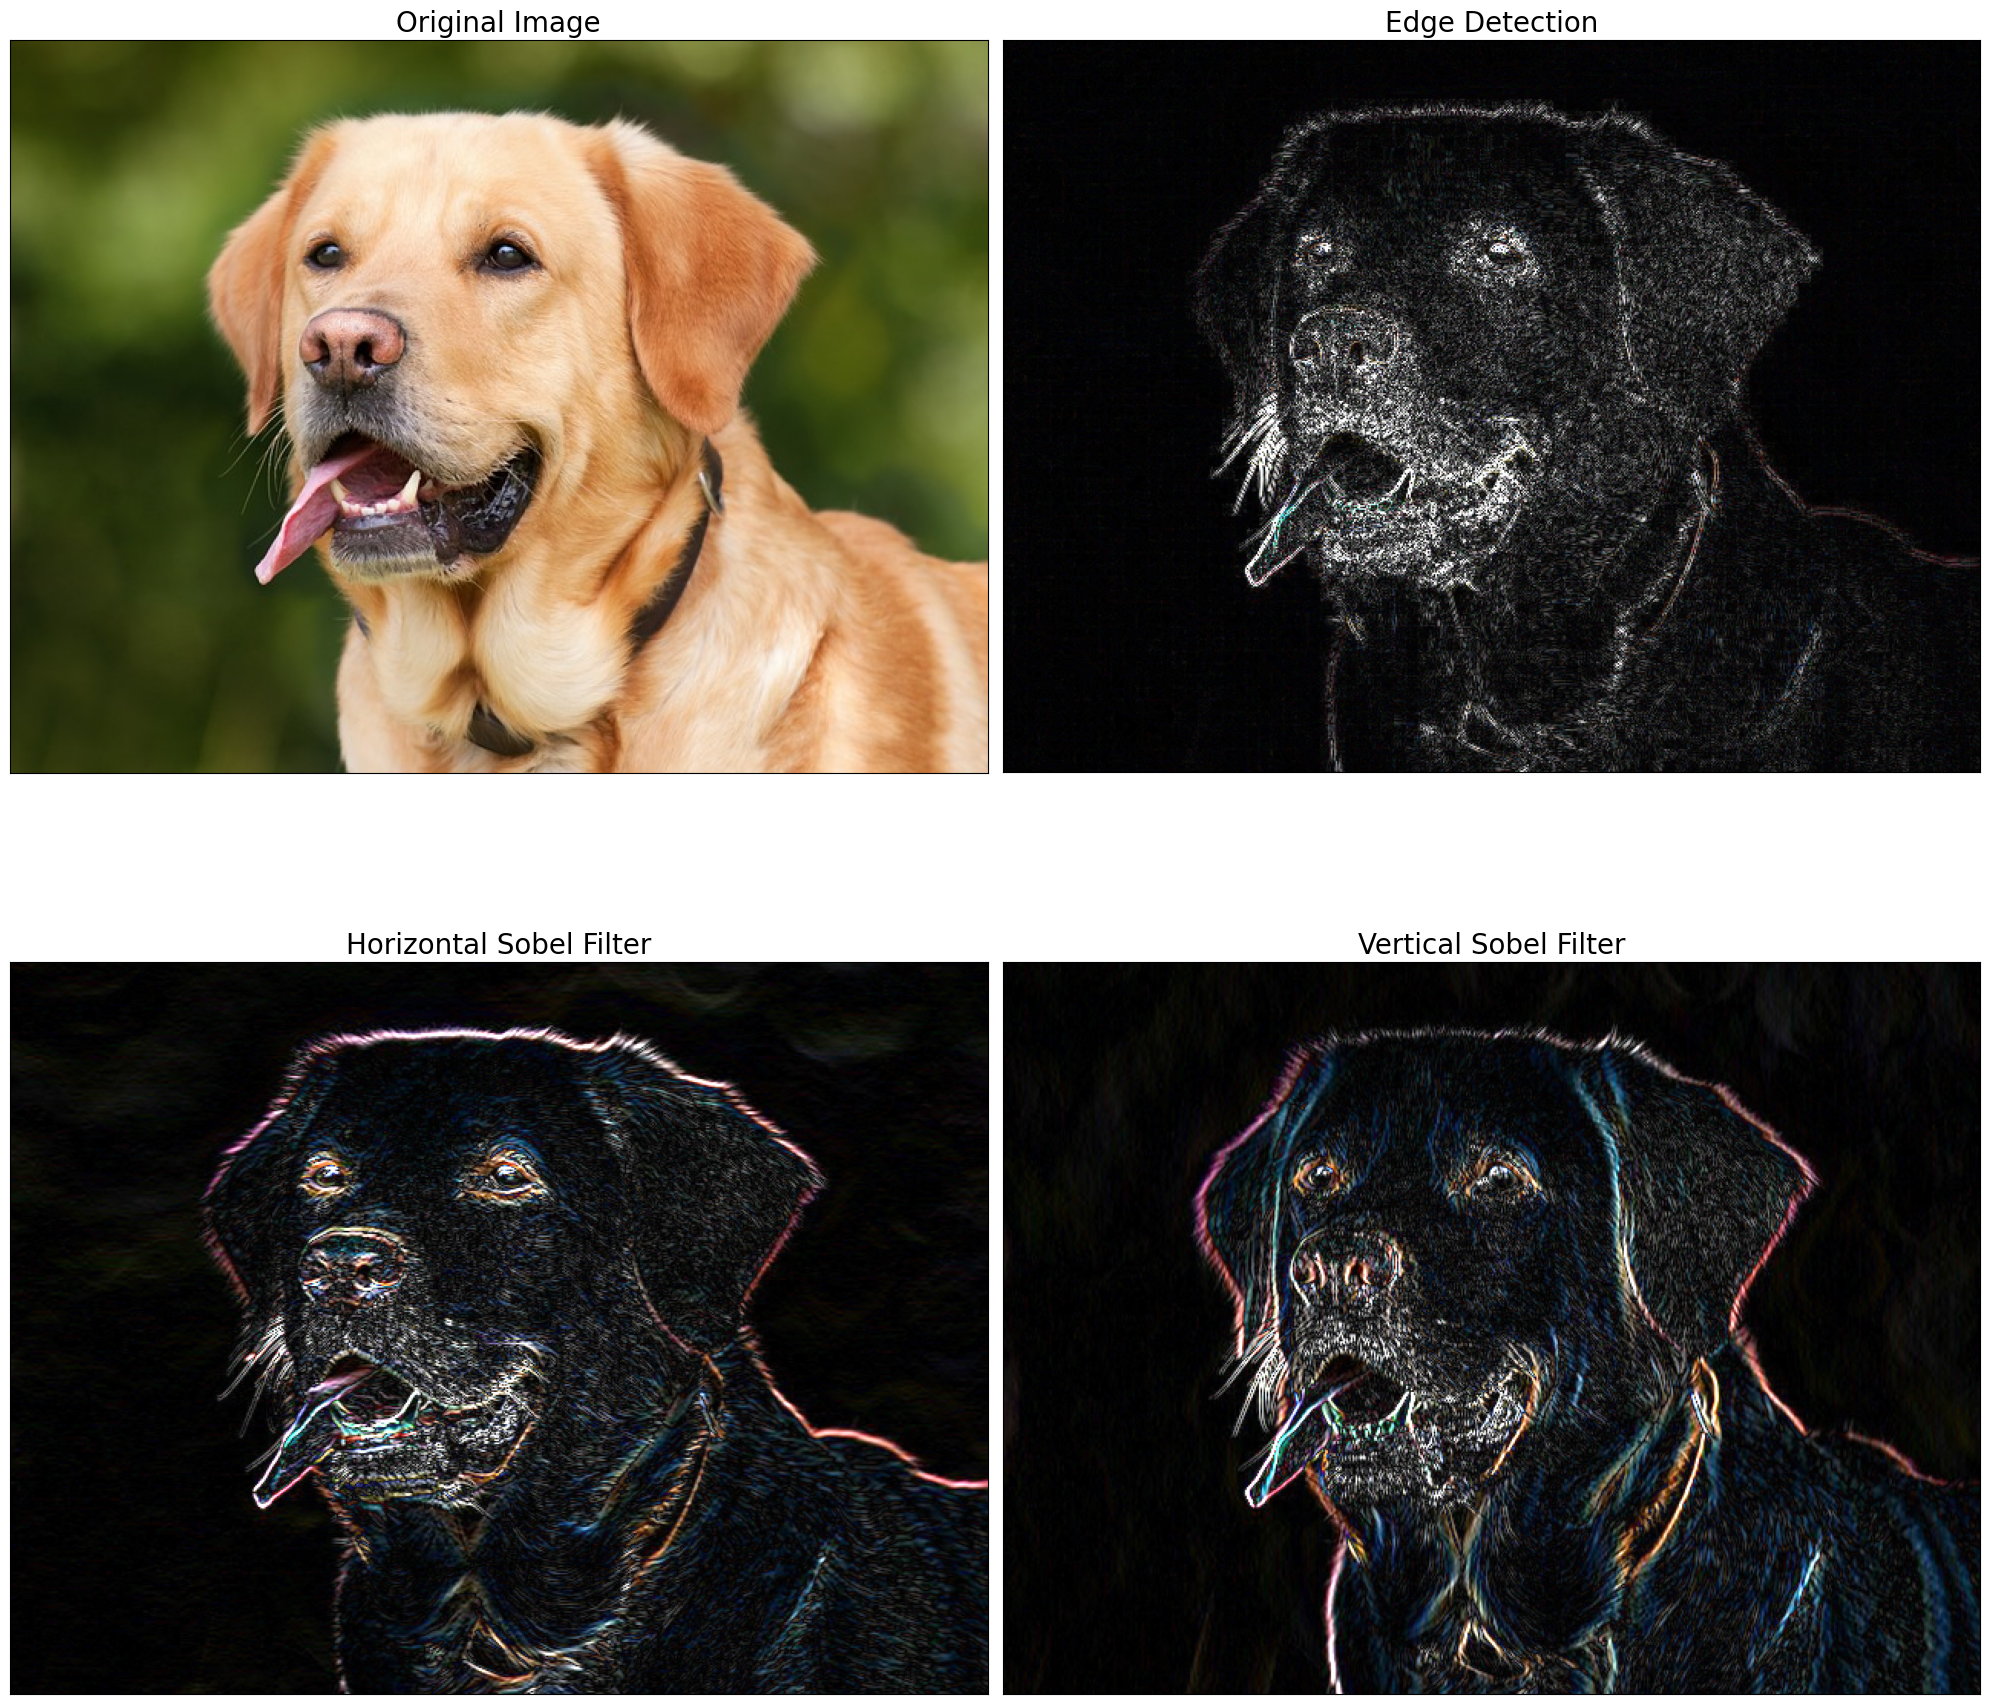

In [ ]:
# Visualize Edge Detection and Sobel Filters
apply_selected_kernels('dorm_lobby.png',
 ['Edge Detection',
 'Horizontal Sobel Filter',
 'Vertical Sobel Filter'],
 plot_cols=2)